In [1]:
# 读取数据
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('song_data.csv')

print(df.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

In [2]:
# 数据预处理
# 去除无关列
df = df.drop(columns='song_name')

# # 对'time_signature','key'列应用独热编码
# df = pd.get_dummies(df, columns=['time_signature','key'])
# print(df.head())


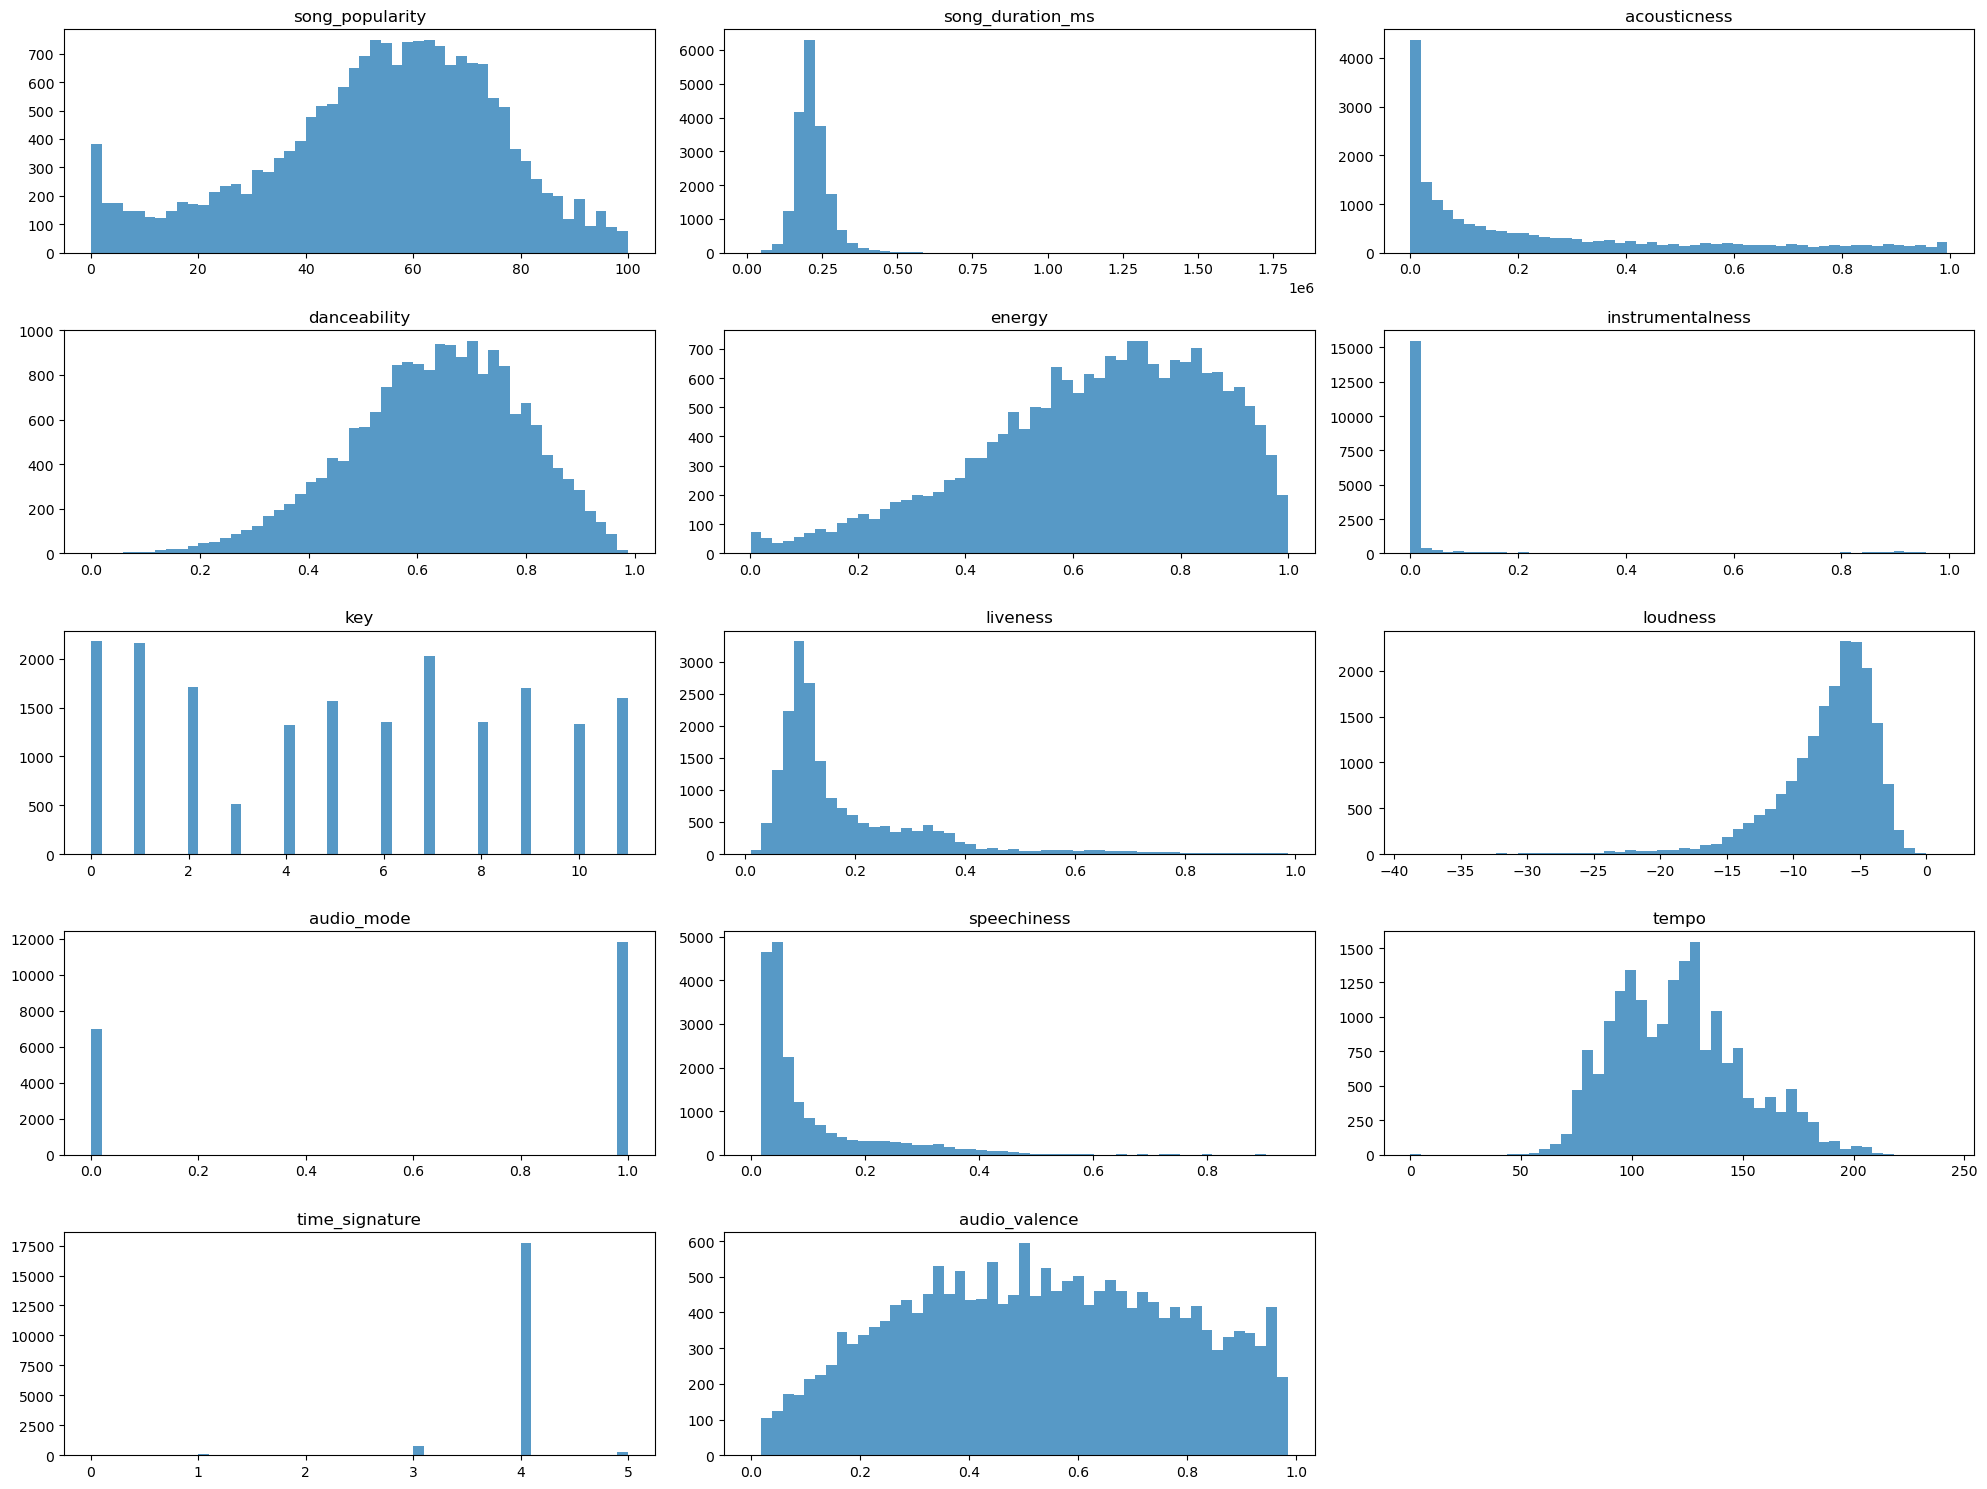

In [3]:
# 可视化样本的每个属性和标签的分布
import matplotlib.pyplot as plt

# 设置画布大小
plt.figure(figsize=(20, 15))

# 为每个属性绘制直方图
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 3, i)  
    plt.hist(df[column], bins=50, alpha=0.75)
    plt.title(f'{column}')

plt.tight_layout()  
plt.show()

In [4]:
# 归一化
from sklearn.preprocessing import MinMaxScaler

# 实例化 MinMaxScaler
scaler = MinMaxScaler()

# 归一化数据
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 将数据的标签列去除，只保留属性
df_scaled = df_scaled.drop('song_popularity', axis=1)

# 显示归一化后的数据
print(df_scaled.head())


   song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          0.140059      0.005541      0.502533  0.682342          0.000029   
1          0.114658      0.010340      0.549139  0.853697          0.000000   
2          0.122938      0.008202      0.746707  0.462888          0.448345   
3          0.114658      0.026505      0.456940  0.970940          0.003561   
4          0.118514      0.000957      0.452888  0.766517          0.000000   

        key  liveness  loudness  audio_mode  speechiness     tempo  \
0  0.727273  0.049226  0.859242         1.0     0.031243  0.689425   
1  0.272727  0.099580  0.801948         0.0     0.052922  0.434371   
2  0.000000  0.250333  0.766734         1.0     0.084166  0.511233   
3  0.000000  0.093426  0.838352         1.0     0.113709  0.505303   
4  0.909091  0.104707  0.835204         1.0     0.033262  0.709856   

   time_signature  audio_valence  
0             0.8       0.481707  
1             0.8       0.376016  

In [5]:
# 进行VIF计算，判断属性间是否存在共线性
from sklearn.linear_model import LinearRegression

def calculate_vif(df):
    vif_df = pd.DataFrame(columns=['Variable', 'VIF'])
    for i, column in enumerate(df.columns):
        X = df.drop(columns=[column])
        y = df[column]
        
        model = LinearRegression()
        model.fit(X, y)
        
        r_squared = model.score(X, y)
        vif = 1 / (1 - r_squared)
        
        vif_df.loc[i] = [column, vif]
    return vif_df

print(calculate_vif(df_scaled))

            Variable       VIF
0   song_duration_ms  1.045011
1       acousticness  1.978771
2       danceability  1.430254
3             energy  3.726267
4   instrumentalness  1.249064
5                key  1.032045
6           liveness  1.052267
7           loudness  2.936453
8         audio_mode  1.058172
9        speechiness  1.102085
10             tempo  1.064834
11    time_signature  1.045487
12     audio_valence  1.393416


                  song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895 

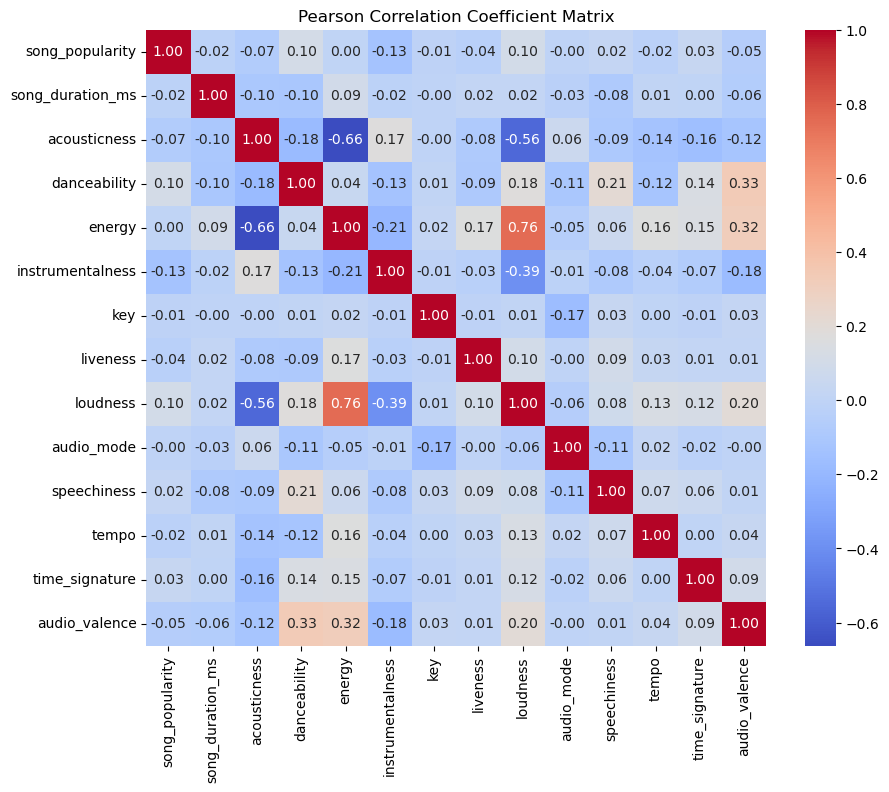

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# 输出相关系数矩阵
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()


In [7]:
# 通过删除属性降低共线性
# df_pca= df_scaled.drop(['energy','acousticness','loudness'],axis=1)

In [8]:
# 进行PCA主成分分析，降维数据，降低共线性
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 标准化数据，将数据转换为均值为0，方法为1的数据
scaler = StandardScaler()
df_normal = scaler.fit_transform(df_scaled)

# 初始化PCA，降维到10个主成分（保留前10个最重要的特征向量）
pca = PCA(n_components=10)
# 对数据进行PCA降维
df_pca = pca.fit_transform(df_normal)

df_pca = pd.DataFrame(data=df_pca,columns = [f'col{i+1}' for i in range(10)])

# 打印降维后的数据
print(df_pca)

# 打印主成分解释的方差比例
print("Variance Ratio of Principal Components:", pca.explained_variance_ratio_)

           col1      col2      col3      col4      col5      col6      col7  \
0     -0.846943  1.631152 -0.038986  0.611880 -1.109957 -1.271005  0.026174   
1     -0.768321  0.561835  0.377349  0.850348  0.510217 -0.114223  0.436944   
2      0.653106  0.559274 -0.764117 -0.592743  1.516375 -0.637518 -0.042661   
3     -0.893883  1.861181 -0.902653 -0.344222  0.623356 -0.637889  0.859136   
4     -1.026627  1.581068  0.218566  0.239754 -1.634296 -1.034338 -0.728384   
...         ...       ...       ...       ...       ...       ...       ...   
18830  3.867882 -0.656065  0.136677 -0.061101 -1.061834  0.170283 -0.742166   
18831  3.334416 -0.839479  1.494108  1.057599 -0.344765  0.469745 -0.202257   
18832  2.568995 -0.465997 -1.581885 -0.739364  0.144507 -0.446529  0.508710   
18833  2.958675  0.971637 -0.740910  1.043072  0.883677  0.199092  0.976221   
18834  2.423939 -0.994003 -1.420532  0.302925 -0.144853  0.597002 -0.163049   

           col8      col9     col10  
0     -0.8155

In [9]:
# 进行模型训练和评估
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 将标签列添加到PCA处理后的DataFrame中
df_scaled['song_popularity'] = df['song_popularity']
print(df_scaled.head())
# 拆分数据集
# X为特征集，y为标签
X = df_scaled.drop('song_popularity', axis=1)
y = df_scaled['song_popularity']

# 使用train_test_split分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# 初始化线性回归模型
lr = LinearRegression()

# 训练模型
lr.fit(X_train, y_train)

# 预测测试集
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# 计算均方误差（MSE）
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error of test: {mse_test}\nMean Squared Error of train: {mse_train}')

# 可视化模型预测值和真实值
results_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_test_pred
})

print(results_df)

   song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          0.140059      0.005541      0.502533  0.682342          0.000029   
1          0.114658      0.010340      0.549139  0.853697          0.000000   
2          0.122938      0.008202      0.746707  0.462888          0.448345   
3          0.114658      0.026505      0.456940  0.970940          0.003561   
4          0.118514      0.000957      0.452888  0.766517          0.000000   

        key  liveness  loudness  audio_mode  speechiness     tempo  \
0  0.727273  0.049226  0.859242         1.0     0.031243  0.689425   
1  0.272727  0.099580  0.801948         0.0     0.052922  0.434371   
2  0.000000  0.250333  0.766734         1.0     0.084166  0.511233   
3  0.000000  0.093426  0.838352         1.0     0.113709  0.505303   
4  0.909091  0.104707  0.835204         1.0     0.033262  0.709856   

   time_signature  audio_valence  song_popularity  
0             0.8       0.481707               73  


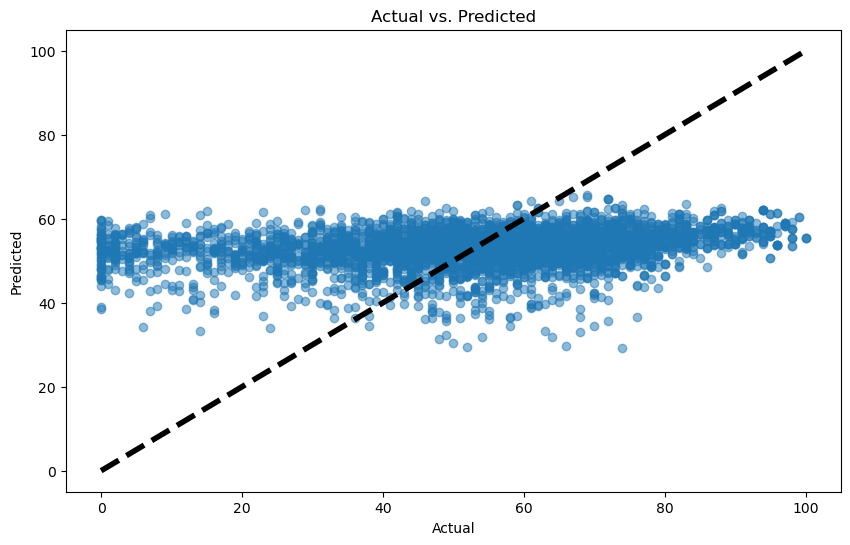

In [10]:
import matplotlib.pyplot as plt

# 假设 y_test 是测试集的真实值，y_test_pred 是模型的预测值

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # 完美预测的基线
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
